In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import seaborn as sns
sns.set()

- データセットの準備

In [ ]:
X,y=mglearn.datasets.make_forge()

In [ ]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [ ]:
df=pd.DataFrame(X,columns=['feature1','feature2'])
df['class']=y
df.head()

In [ ]:
sns.scatterplot(
    data=df,
    x='feature1',
    y='feature2',
    hue='class',
    style='class',
)

In [ ]:
X,y = mglearn.datasets.make_wave(n_samples=40)
df=pd.DataFrame(X,columns=['feature'])
df['responce']=y
sns.scatterplot(
    data=df,
    x='feature',
    y='responce'
    )

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

In [ ]:
class_df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
class_df['target']=cancer['target']
class_df['target_name']=class_df['target'].apply(lambda x:cancer['target_names'][x])
class_df.head()

In [ ]:
class_df['target_name'].value_counts()

In [ ]:
X,y = mglearn.datasets.load_extended_boston()

In [ ]:
reg_df = pd.DataFrame(X)

In [ ]:
reg_df

- k最近傍法

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [ ]:
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
clf.predict(X_test)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
fig,axes = plt.subplots(ncols=3,nrows=1,figsize=(10,3),tight_layout=True)
axes = axes.ravel()
for n,ax in zip([1,3,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(f'{n} neighbor(s)')
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(cancer['data'],cancer['target'],random_state=3)
training_accuracy=[]
test_accuracy=[]
for n in range(1,21):
    clf=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

sns.lineplot(
    data=pd.DataFrame({
        'training_accuracy':training_accuracy,
        'test_accuracy':test_accuracy
    }),
)

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
mglearn.plots.plot_knn_regression(n_neighbors=10)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
reg=KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)

In [ ]:
reg.score(X_test,y_test)

In [ ]:
np.arange(1,11).reshape(-1,1)

In [ ]:
test_sampls=np.linspace(-3,3,1000).reshape(-1,1)
n=[1,3,7,9]
fig,axes=plt.subplots(2,2,figsize=(8,8),tight_layout=True)
axes=axes.ravel()
for n,ax in zip(n,axes):
    reg=KNeighborsRegressor(n_neighbors=n).fit(X_train,y_train)
    preds=reg.predict(test_sampls)
    ax.plot(test_sampls,preds)
    ax.scatter(X_train,y_train,marker='^',c='b')
    ax.scatter(X_test,y_test,marker='v',c='r')
    ax.set_title(f'{n} neighbor')
    ax.set_ylabel('responce')
    ax.set_xlabel('feature')

axes[0].legend(['predict','train','test'],loc='best')


- 線型モデル

In [ ]:
mglearn.plots.plot_linear_regression_wave()

In [ ]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
ln=LinearRegression().fit(X_train,y_train)
print(f'coef:{ln.coef_}')
print(f'intercept:{ln.intercept_}')
print(f'train_score:{np.round(ln.score(X_train,y_train),2)}')
print(f'test_score:{np.round(ln.score(X_test,y_test),2)}')

In [ ]:
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
ln=LinearRegression().fit(X_train,y_train)
# print(f'coef:{ln.coef_}')
# print(f'intercept:{ln.intercept_}')
print(f'train_score:{np.round(ln.score(X_train,y_train),2)}')
print(f'test_score:{np.round(ln.score(X_test,y_test),2)}')

- リッジ回帰  
各変数の重みを最小化する、という目線で制約をかける＝L2正則化

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train,y_train)
# print(f'coef:{ln.coef_}')
# print(f'intercept:{ln.intercept_}')
print(f'train_score:{np.round(ridge.score(X_train,y_train),2)}')
print(f'test_score:{np.round(ridge.score(X_test,y_test),2)}')

In [ ]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)
# print(f'coef:{ln.coef_}')
# print(f'intercept:{ln.intercept_}')
print(f'train_score:{np.round(ridge10.score(X_train,y_train),2)}')
print(f'test_score:{np.round(ridge10.score(X_test,y_test),2)}')

In [ ]:
ridge01=Ridge(alpha=.1).fit(X_train,y_train)
# print(f'coef:{ln.coef_}')
# print(f'intercept:{ln.intercept_}')
print(f'train_score:{np.round(ridge01.score(X_train,y_train),2)}')
print(f'test_score:{np.round(ridge01.score(X_test,y_test),2)}')

In [ ]:
plt.plot(ridge.coef_,'s',label='alpha=1')
plt.plot(ridge10.coef_,'^',label='alpha=10')
plt.plot(ridge01.coef_,'v',label='alpha=.1')
plt.plot(ln.coef_,'o',label='liner')
plt.xlabel('coeficient_no')
plt.xlabel('weight')
plt.ylim(-25,25)
plt.legend()

In [ ]:
mglearn.plots.plot_ridge_n_samples()

- Lasso回帰  
ridgeよりも変数を削除する（影響しない係数を０にすることを目指す）正則化ロジック。L1正則化

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
print(f'train_score:{np.round(lasso.score(X_train,y_train),2)}')
print(f'test_score:{np.round(lasso.score(X_test,y_test),2)}')
print(f'used:{np.sum(lasso.coef_!=0)}')

In [ ]:
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print(f'train_score:{np.round(lasso001.score(X_train,y_train),2)}')
print(f'test_score:{np.round(lasso001.score(X_test,y_test),2)}')
print(f'used:{np.sum(lasso001.coef_!=0)}')

In [ ]:
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print(f'train_score:{np.round(lasso00001.score(X_train,y_train),2)}')
print(f'test_score:{np.round(lasso00001.score(X_test,y_test),2)}')
print(f'used:{np.sum(lasso00001.coef_!=0)}')

In [ ]:
# plt.plot(ridge.coef_,'o',label='ridge alpha=1')
plt.plot(lasso.coef_,'s',label='lasso alpha=1')
plt.plot(lasso001.coef_,'^',label='lasso alpha=.01')
# plt.plot(lasso00001.coef_,'v',label='lasso alpha=.00001')

plt.xlabel('coeficient_no')
plt.xlabel('weight')
# plt.ylim(-25,25)
plt.legend()

- 線型回帰による分類モデル SVMとロジスティック回帰

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()
fig,axes = plt.subplots(1,2,figsize=(10,3))

for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(f'{clf.__class__.__name__}')
    ax.set_xlabel('feature0')
    ax.set_ylabel('feature1')

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=0
    )
logreg=LogisticRegression(max_iter=10000).fit(X_train,y_train)
print(f'training set score:{logreg.score(X_train,y_train):.2f}')
print(f'test set score:{logreg.score(X_test,y_test):.2f}')

In [ ]:
logreg100=LogisticRegression(C=100,max_iter=10000).fit(X_train,y_train)
print(f'training set score:{logreg100.score(X_train,y_train):.2f}')
print(f'test set score:{logreg100.score(X_test,y_test):.2f}')

In [ ]:
logreg001=LogisticRegression(C=.01,max_iter=10000).fit(X_train,y_train)
print(f'training set score:{logreg001.score(X_train,y_train):.2f}')
print(f'test set score:{logreg001.score(X_test,y_test):.2f}')

In [ ]:
plt.plot(logreg.coef_.T,'o',label='C=1')
plt.plot(logreg100.coef_.T,'^',label='C=100')
plt.plot(logreg001.coef_.T,'^',label='C=0.01')
plt.legend()
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=0
    )
for C,maker in zip([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(C=C,penalty='l1',solver='liblinear').fit(X_train,y_train)
    plt.plot(lr_l1.coef_.T,maker,label='C=1')


- 多クラス分類

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
plt.scatter(x=X[y==0,0],y=X[y==0,1],c='r',marker='o')
plt.scatter(x=X[y==1,0],y=X[y==1,1],c='g',marker='^')
plt.scatter(x=X[y==2,0],y=X[y==2,1],c='b',marker='v')
plt.legend(['class0','class1','class2'])

In [ ]:

from sklearn.svm import LinearSVC
linear_svc = LinearSVC().fit(X,y)
print(f'coeficient shape:{linear_svc.coef_.shape}')
print(f'intercept shape:{linear_svc.intercept_.shape}')

分類境界はcoef1*x1+coef2*x2+intercept=0になる線。  
x2について解くと、x2=-(coef1*x1+intercept)/coef2

In [ ]:
plt.scatter(x=X[y==0,0],y=X[y==0,1],c='r',marker='o')
plt.scatter(x=X[y==1,0],y=X[y==1,1],c='g',marker='^')
plt.scatter(x=X[y==2,0],y=X[y==2,1],c='b',marker='v')

line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svc.coef_,linear_svc.intercept_,['r','g','b']):
    plt.plot(line,-((line*coef[0])+intercept)/coef[1],c=color)

plt.xlim(-15,15)
plt.ylim(-15,15)

plt.legend(['class0','class1','class2','class0 line','class1 line','class2 line'])

In [ ]:
mglearn.plots.plot_2d_classification(linear_svc,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svc.coef_,linear_svc.intercept_,['b','r','g']):
    plt.plot(line,-((line*coef[0])+intercept)/coef[1],c=color)
plt.legend(['class0','class1','class2','class0 line','class1 line','class2 line'],loc=(1.01,0.3))

- ナイーブベイズ  
3種類ある。  
Gaussianは連続値  
bernoulliは2値  
Multinomiaは頻度  

In [ ]:
X=np.array([
    [0,1,0,1],
    [1,0,1,1],
    [0,0,0,1],
    [1,0,1,0]
])
y=np.array([0,1,0,1])

In [ ]:
counts={}
for label in np.unique(y):
    counts[label]=X[y==label].sum(axis=0)
print(counts)

- 決定木

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,random_state=42
)
tree=DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
print(f'accuracy on training : {tree.score(X_train,y_train):.3f}')
print(f'accuracy on test : {tree.score(X_test,y_test):.3f}')

In [ ]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0).fit(X_train,y_train)
print(f'accuracy on training : {tree.score(X_train,y_train):.3f}')
print(f'accuracy on test : {tree.score(X_test,y_test):.3f}')

In [ ]:
cancer.feature_names

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree,
    out_file='tree.dot',
    class_names=cancer.target_names,
    feature_names=cancer.feature_names,
    impurity=False,
    filled=True,
)

In [ ]:
print(f'feature importances:{tree.feature_importances_}')

In [ ]:
def feature_importances_plot(model):
    n_features=cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('feature')

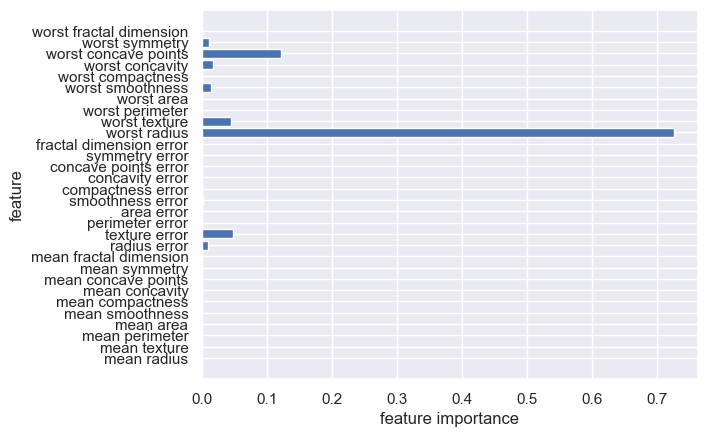

In [15]:
feature_importances_plot(tree)

Feature importances: [0. 1.]


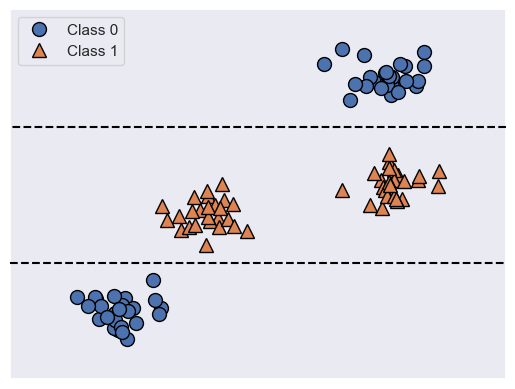

In [17]:
tree=mglearn.plots.plot_tree_not_monotone()

In [18]:
import os
ram_price=pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,'ram_price.csv'))

Text(0, 0.5, 'price in $/Mbyte')

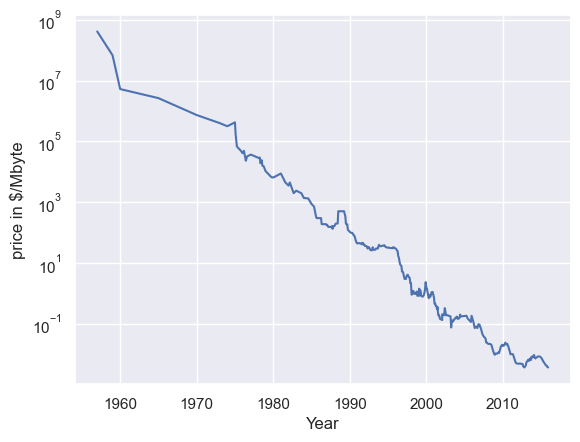

In [19]:
plt.semilogy(ram_price.date,ram_price.price)
plt.xlabel('Year')
plt.ylabel(r'price in $/Mbyte')

In [21]:
ram_price

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
328,328,2015.58,4.500000e-03
329,329,2015.67,4.300000e-03
330,330,2015.75,4.200000e-03
331,331,2015.83,3.800000e-03


In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train = ram_price[ram_price.date < 2000]
data_test =ram_price[ram_price.date >= 2000]


In [35]:
X_train=data_train.date.to_numpy()[:,np.newaxis]
y_train=np.log(data_train.price)

tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)

X_all = ram_price.date.to_numpy()[:,np.newaxis]

pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

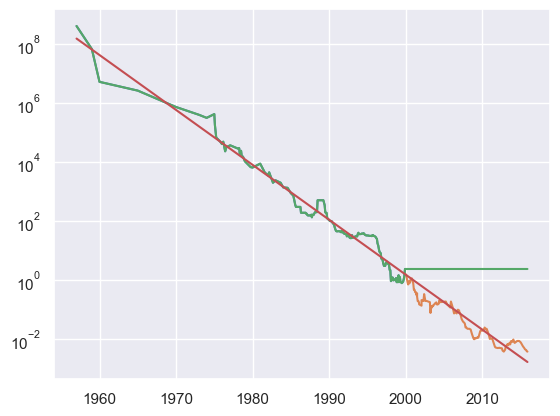

In [42]:
plt.semilogy(data_train.date,data_train.price,label='train_data')
plt.semilogy(data_test.date,data_test.price,label='test_data')
plt.semilogy(ram_price.date,price_tree,label='Tree prediction')
plt.semilogy(ram_price.date,price_lr,label='Liner Regression prediction')

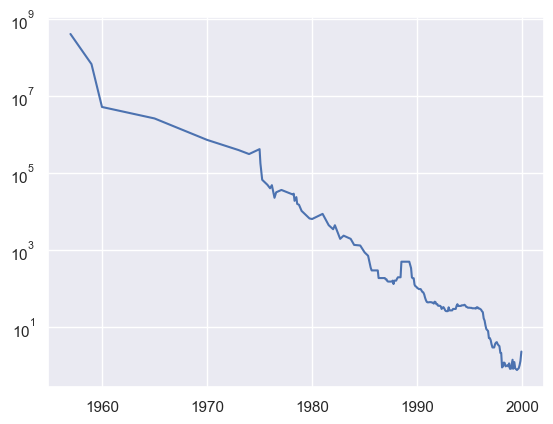

In [ ]:
plt.semilogy(data_train.date,data_train.price,label='train_data')

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [46]:
X,y = make_moons(n_samples=100,noise=.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [47]:
forest=RandomForestClassifier(n_estimators=5,random_state=2).fit(X_train,y_train)

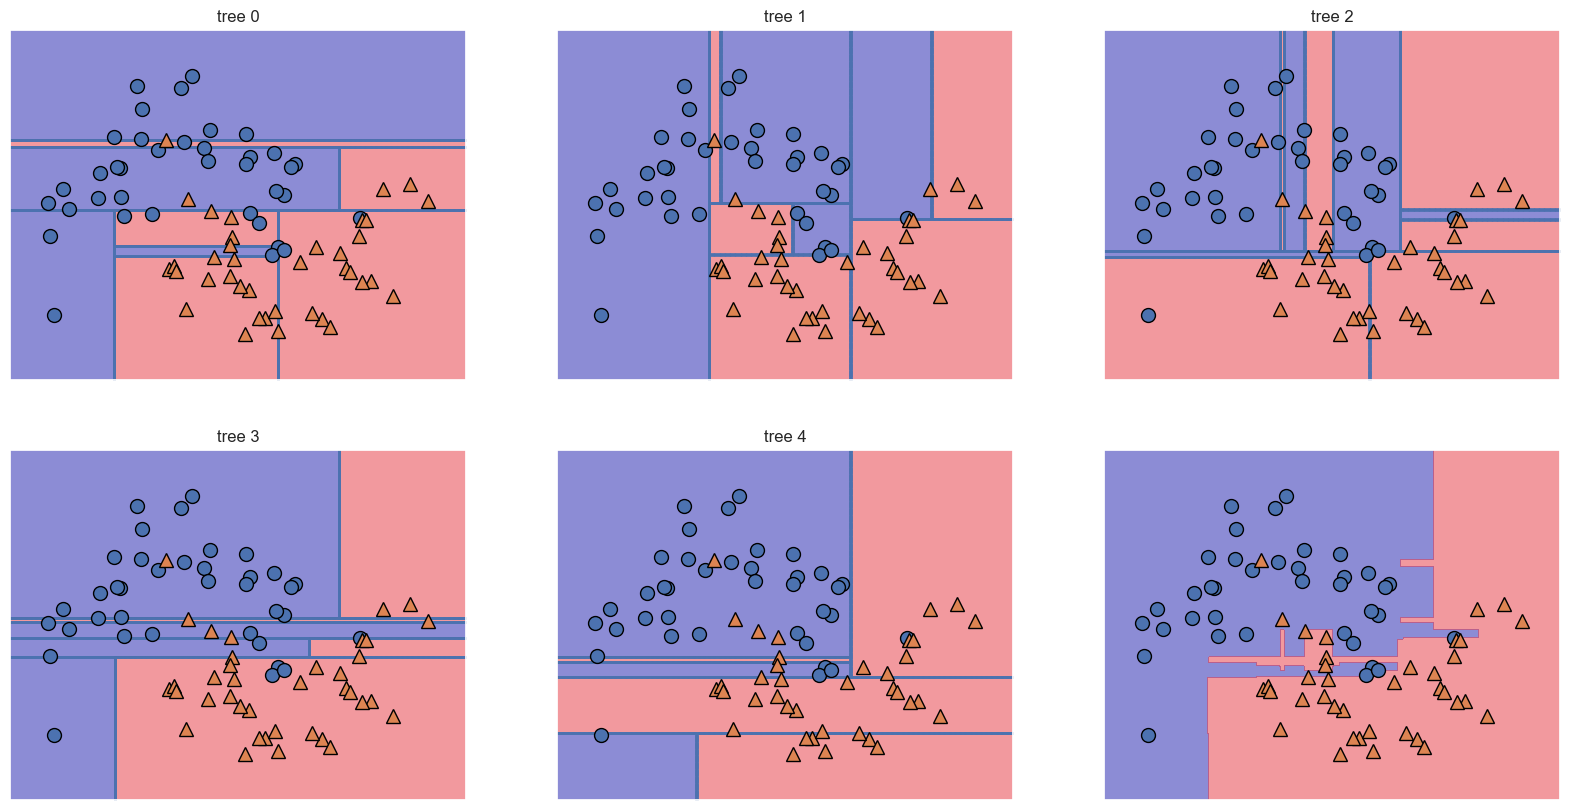

In [49]:
fig,axes = plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip (axes.ravel(),forest.estimators_)):
    ax.set_title(f'tree {i}')
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],alpha=.4)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

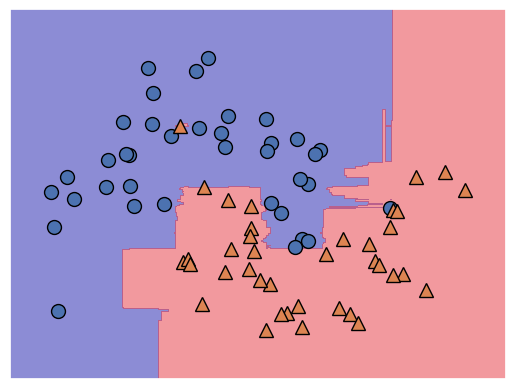

In [51]:
forest=RandomForestClassifier(n_estimators=100,random_state=2).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(forest,X_train,fill=True,alpha=.4)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

In [54]:
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,random_state=0
)
forest=RandomForestClassifier(n_estimators=100,random_state=0).fit(X_train,y_train)
print(f'accuracy of train:{forest.score(X_train,y_train):.2f}')
print(f'accuracy of test:{forest.score(X_test,y_test):.2f}')

accuracy of train:1.00
accuracy of test:0.97


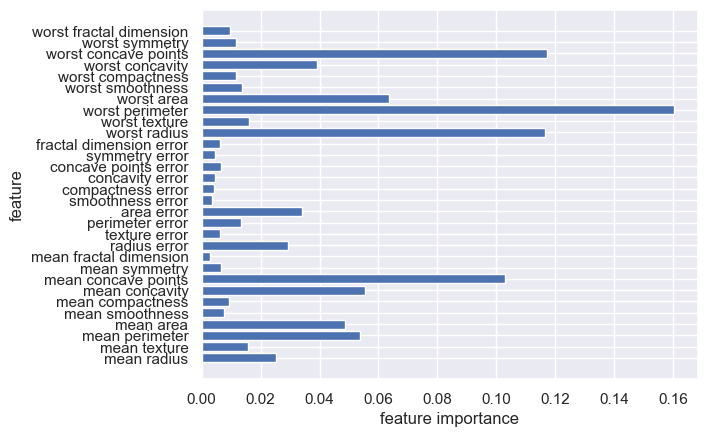

In [56]:
feature_importances_plot(forest)

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,random_state=0
)
gbrt=GradientBoostingClassifier(random_state=0).fit(X_train,y_train)
print(f'accuracy of train:{gbrt.score(X_train,y_train):.3f}')
print(f'accuracy of test:{gbrt.score(X_test,y_test):.3f}')

accuracy of train:1.000
accuracy of test:0.965


In [59]:
from sklearn.ensemble import GradientBoostingClassifier
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,random_state=0
)
gbrt=GradientBoostingClassifier(max_depth=1,random_state=0).fit(X_train,y_train)
print(f'accuracy of train:{gbrt.score(X_train,y_train):.3f}')
print(f'accuracy of test:{gbrt.score(X_test,y_test):.3f}')

accuracy of train:0.991
accuracy of test:0.972


In [64]:
from sklearn.ensemble import GradientBoostingClassifier
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,random_state=0
)
gbrt=GradientBoostingClassifier(learning_rate=.01,random_state=0).fit(X_train,y_train)
print(f'accuracy of train:{gbrt.score(X_train,y_train):.3f}')
print(f'accuracy of test:{gbrt.score(X_test,y_test):.3f}')

accuracy of train:0.988
accuracy of test:0.965


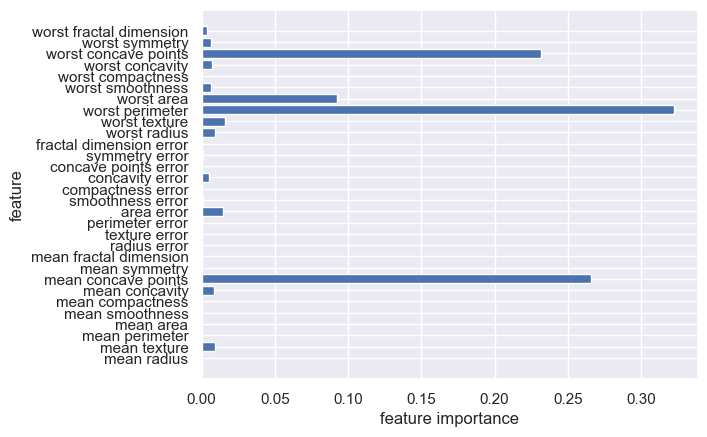

In [66]:
gbrt=GradientBoostingClassifier(max_depth=1,random_state=0).fit(X_train,y_train)
feature_importances_plot(gbrt)

* SVM

Text(0.5, 0, 'feature1')

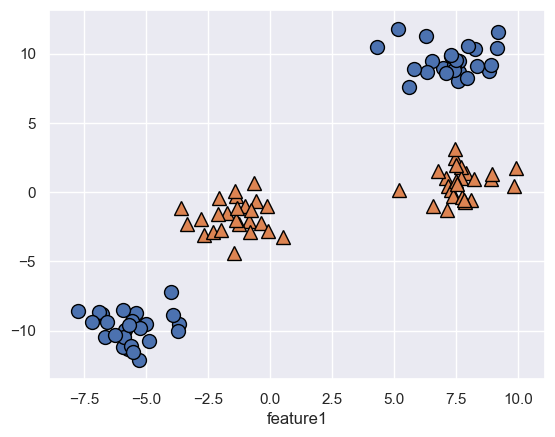

In [102]:
from sklearn.datasets import make_blobs
X,y=make_blobs(centers=4,random_state=8)
y=y%2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('feature0')
plt.xlabel('feature1')

In [107]:
X2=X[:,1:]**2

In [114]:
X[:,1:]

array([[ -1.48033142],
       [ -9.5482383 ],
       [  0.99508772],
       [ -0.3148625 ],
       [ -3.12591651],
       [  8.69797933],
       [-12.11880698],
       [  1.41547387],
       [  0.11296348],
       [ -1.03318203],
       [ 10.34723435],
       [  8.9622523 ],
       [ -2.12185612],
       [  2.49392925],
       [  1.8420701 ],
       [ -8.61800744],
       [ -8.7194128 ],
       [ -2.89699926],
       [ -2.33416219],
       [  9.4463627 ],
       [  8.76386046],
       [  0.43090048],
       [  9.16217702],
       [ 11.78064756],
       [ -1.57846672],
       [  9.45532341],
       [  8.0197955 ],
       [  0.68997013],
       [-10.77386053],
       [  0.97764968],
       [ -0.58369965],
       [ -2.88641638],
       [  1.76719511],
       [ -2.02701586],
       [  7.59170022],
       [ -9.51656559],
       [ -0.60647802],
       [ 11.28717687],
       [  3.10336163],
       [ -9.27237881],
       [  0.99191322],
       [ -2.2023075 ],
       [ -9.99476306],
       [-11

In [108]:
X2.shape

(100, 1)

In [106]:
np.hstack([X,X2])

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

Text(0.5, 0, 'feature1 **2')

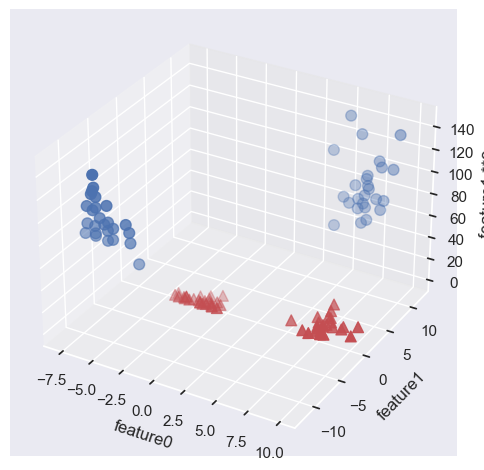

In [120]:
X_new = np.hstack([X,X[:,1:]**2])
fig = plt.figure(figsize=(5,5),tight_layout=True)
ax = fig.add_subplot(projection = '3d')
mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',s=60)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 **2')

/Users/yutaro/Documents/source/sutdy_ML_with_python/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/yutaro/Documents/source/sutdy_ML_with_python/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0.5, 0, 'feature1 **2')

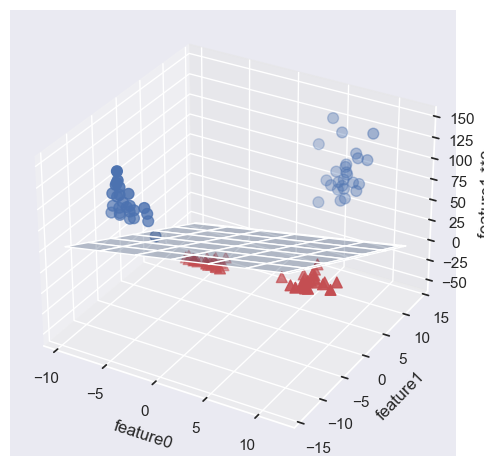

In [121]:
from sklearn.svm import LinearSVC
liner_svm_3d=LinearSVC().fit(X_new,y)
coef,intercept=liner_svm_3d.coef_.ravel(),liner_svm_3d.intercept_

xx=np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

XX,YY = np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]

fig = plt.figure(figsize=(5,5),tight_layout=True)
ax = fig.add_subplot(projection = '3d')

ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',s=60)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 **2')

In [ ]:
ZZ=YY**2
dec=liner_svm_3d.decision_function(
    np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()]
)
plt.count